# **Level 1 – Task 1: Top Cuisines**


---


In this task, we aim to analyze the types of cuisines served across restaurants
in the dataset. The goal is to:

*   Identify the top three most common cuisines served by restaurants.
*   Calculate the percentage of restaurants that offer each of these top cuisines.
This kind of analysis helps understand customer preferences and market trends, which is valuable for restaurant chains, food delivery platforms, and urban planners working on food infrastructure.

In [16]:
import pandas as pd

In [17]:
df = pd.read_csv('/content/drive/MyDrive/Dataset.csv')

In [18]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [19]:
df['Cuisines'].head()

,Cuisines
0,"French, Japanese, Desserts"
1,Japanese
2,"Seafood, Asian, Filipino, Indian"
3,"Japanese, Sushi"
4,"Japanese, Korean"


In [20]:
cuisine_series = df['Cuisines'].dropna().str.split(', ').explode()

In [21]:
top_cuisines = cuisine_series.value_counts().head(3)
print("Top 3 Cuisines:\n", top_cuisines)

Top 3 Cuisines:
 Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


In [22]:
total_restaurants = df.shape[0]

In [23]:
percentages = (top_cuisines / total_restaurants) * 100
print("\nPercentage of Restaurants Serving Top Cuisines:\n", percentages.round(2))


Percentage of Restaurants Serving Top Cuisines:
 Cuisines
North Indian    41.46
Chinese         28.64
Fast Food       20.79
Name: count, dtype: float64


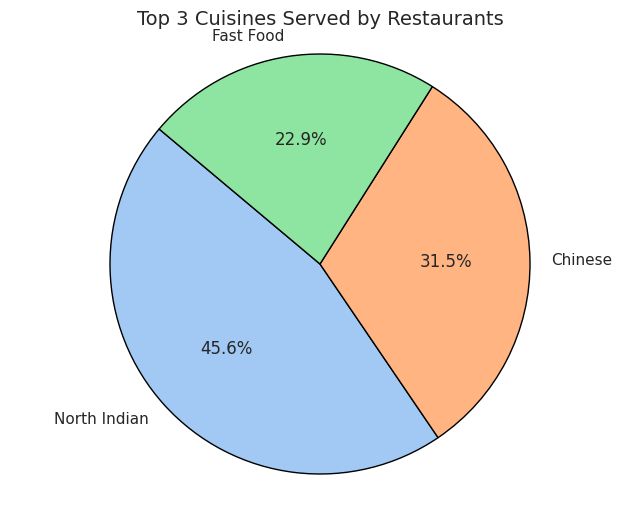

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


labels = ['North Indian', 'Chinese', 'Fast Food']
sizes = [41.46, 28.64, 20.79]
colors = sns.color_palette("pastel")[0:3]


plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Top 3 Cuisines Served by Restaurants', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# **Level 1 – Task 2: City Analysis**


---


In this task, we will perform an analysis of restaurant distribution and ratings across cities. Specifically, we aim to:


*   Identify the city with the highest number of restaurants.
*   Determine the city with the highest average restaurant rating.


This analysis provides insights into geographic trends in the restaurant industry, which can help in expansion strategies and targeted marketing.



In [25]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [26]:
df['City'] = df['City'].fillna('Unknown')
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

In [27]:
city_counts = df['City'].value_counts()
top_city = city_counts.idxmax()
print(f"City with the highest number of restaurants: {top_city} ({city_counts.max()} restaurants)")

City with the highest number of restaurants: New Delhi (5473 restaurants)


In [28]:
avg_rating_by_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
print("\nAverage Ratings by City:\n", avg_rating_by_city)


Average Ratings by City:
 City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438845
Montville           2.400000
Mc Millan           2.400000
Noida               2.036204
Faridabad           1.866932
Name: Aggregate rating, Length: 141, dtype: float64


In [29]:
avg_rating_by_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
print("\nAverage Ratings by City:\n", avg_rating_by_city)


Average Ratings by City:
 City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438845
Montville           2.400000
Mc Millan           2.400000
Noida               2.036204
Faridabad           1.866932
Name: Aggregate rating, Length: 141, dtype: float64


In [30]:
top_avg_rating_city = avg_rating_by_city.idxmax()
print(f"\nCity with the highest average rating: {top_avg_rating_city} ({avg_rating_by_city.max():.2f})")


City with the highest average rating: Inner City (4.90)


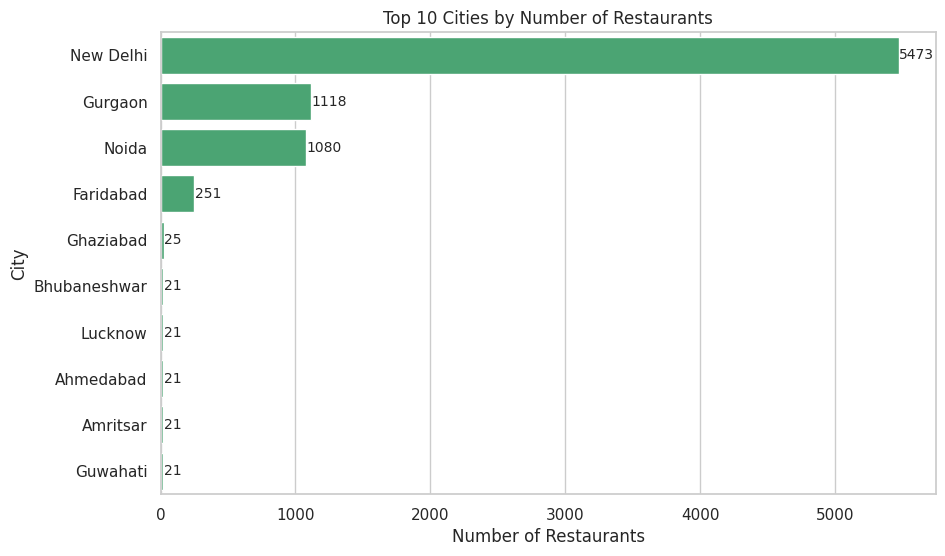

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

city_counts = df['City'].value_counts()
top_10_cities = city_counts.head(10)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=top_10_cities.values, y=top_10_cities.index, color='mediumseagreen')

plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.title("Top 10 Cities by Number of Restaurants")

# Display count values on bars
for i, value in enumerate(top_10_cities.values):
    plt.text(value + 1, i, str(value), va='center', fontsize=10)

plt.show()


# **Level 1 – Task 3: Price Range Distribution**


---

In this task, we will:


*   Visualize the distribution of restaurants across different price ranges using a histogram or bar chart.
*   Calculate the percentage of restaurants that fall into each price range category

This helps us understand how restaurants are priced and where most options lie, which can be useful for market segmentation and customer targeting.

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Price Range categories:", df['Price range'].unique())

Price Range categories: [3 4 2 1]


In [33]:
price_counts = df['Price range'].value_counts().sort_index()

In [34]:
price_percent = (price_counts / price_counts.sum()) * 100
print("Percentage of restaurants by price range:\n", price_percent)

Percentage of restaurants by price range:
 Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


<ipython-input-35-bc75f28a1a57>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_counts.index, y=price_counts.values, palette=palette)


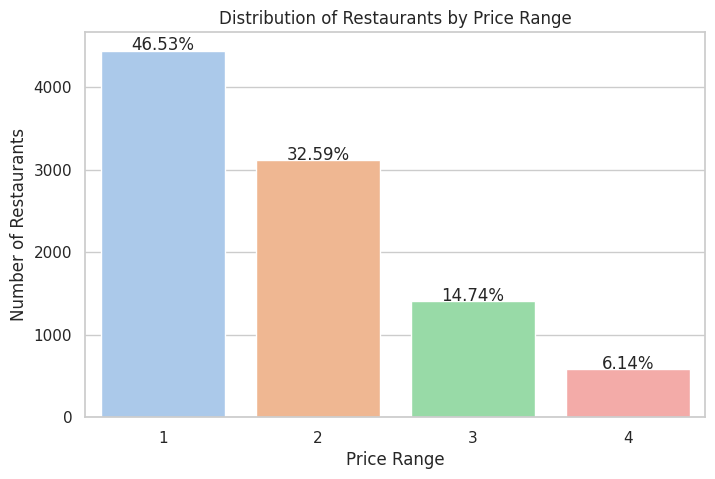

In [35]:
plt.figure(figsize=(8, 5))
palette = sns.color_palette("pastel", n_colors=len(price_counts))
sns.barplot(x=price_counts.index, y=price_counts.values, palette=palette)

plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurants by Price Range')

# Display percentage labels on top of bars
for i, count in enumerate(price_counts.values):
    plt.text(i, count + 5, f'{price_percent.values[i]:.2f}%', ha='center')

plt.show()